In [1]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm import tqdm_notebook
import plotly.figure_factory as ff

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [8]:
data=pd.read_csv("water_potability.csv")

In [9]:
data.head(5)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

**EDA**

In [10]:
data.shape

(3276, 10)

In [11]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<Axes: >

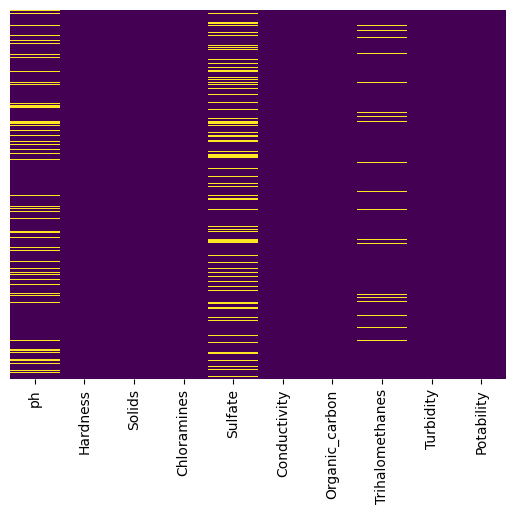

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
for i in data.columns:
  if data[i].isnull().sum()>0:
    print("There are {} null values in {} column".format(data[i].isnull().sum(),i))

There are 491 null values in ph column
There are 781 null values in Sulfate column
There are 162 null values in Trihalomethanes column


**HANDLING NULL VALUES**

In [16]:
data['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

In [17]:
data['ph_mean']=data['ph'].fillna(data['ph'].mean())

In [18]:
data['ph_mean'].isnull().sum()

0

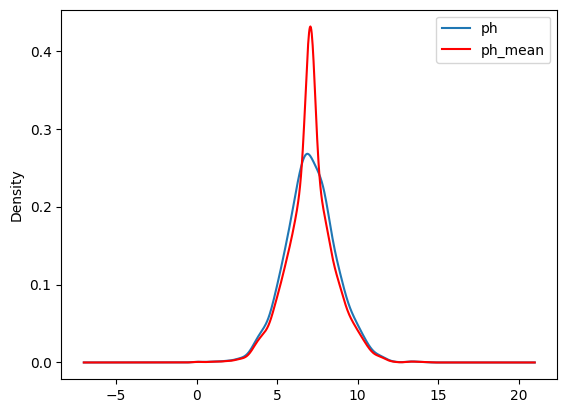

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['ph'].plot(kind='kde', ax=ax)
data.ph_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

DISTRIBUTION IS NOT UNIFORM

In [20]:
#Filling data with random variables

def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [21]:
impute_nan(data,"ph")

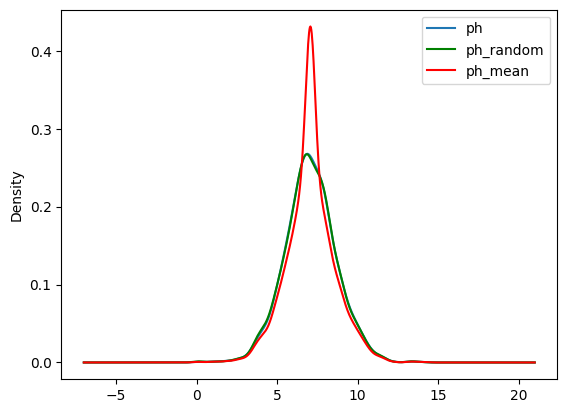

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['ph'].plot(kind='kde', ax=ax)
data.ph_random.plot(kind='kde', ax=ax, color='green')
data.ph_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

UNIFORM DISTRIBUTION WITH RANDOM INITIALISATION


In [23]:
impute_nan(data,"Sulfate") #custom function to handle missing values

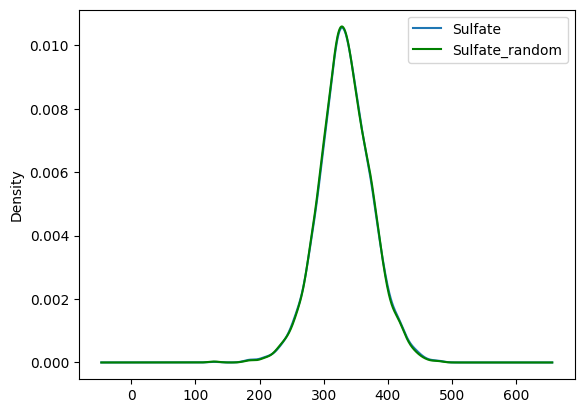

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Sulfate'].plot(kind='kde', ax=ax)
data["Sulfate_random"].plot(kind='kde', ax=ax, color='green')
#data.ph_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [25]:
impute_nan(data,"Trihalomethanes")

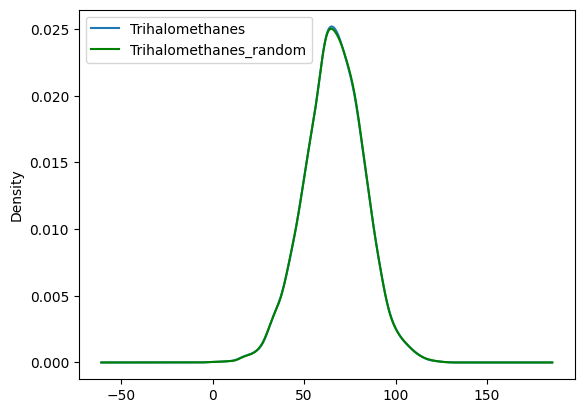

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Trihalomethanes'].plot(kind='kde', ax=ax)
data.Trihalomethanes_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [27]:
data=data.drop(['ph','Sulfate','Trihalomethanes','ph_mean'],axis=1)

In [28]:
data.isnull().sum()

Hardness                  0
Solids                    0
Chloramines               0
Conductivity              0
Organic_carbon            0
Turbidity                 0
Potability                0
ph_random                 0
Sulfate_random            0
Trihalomethanes_random    0
dtype: int64

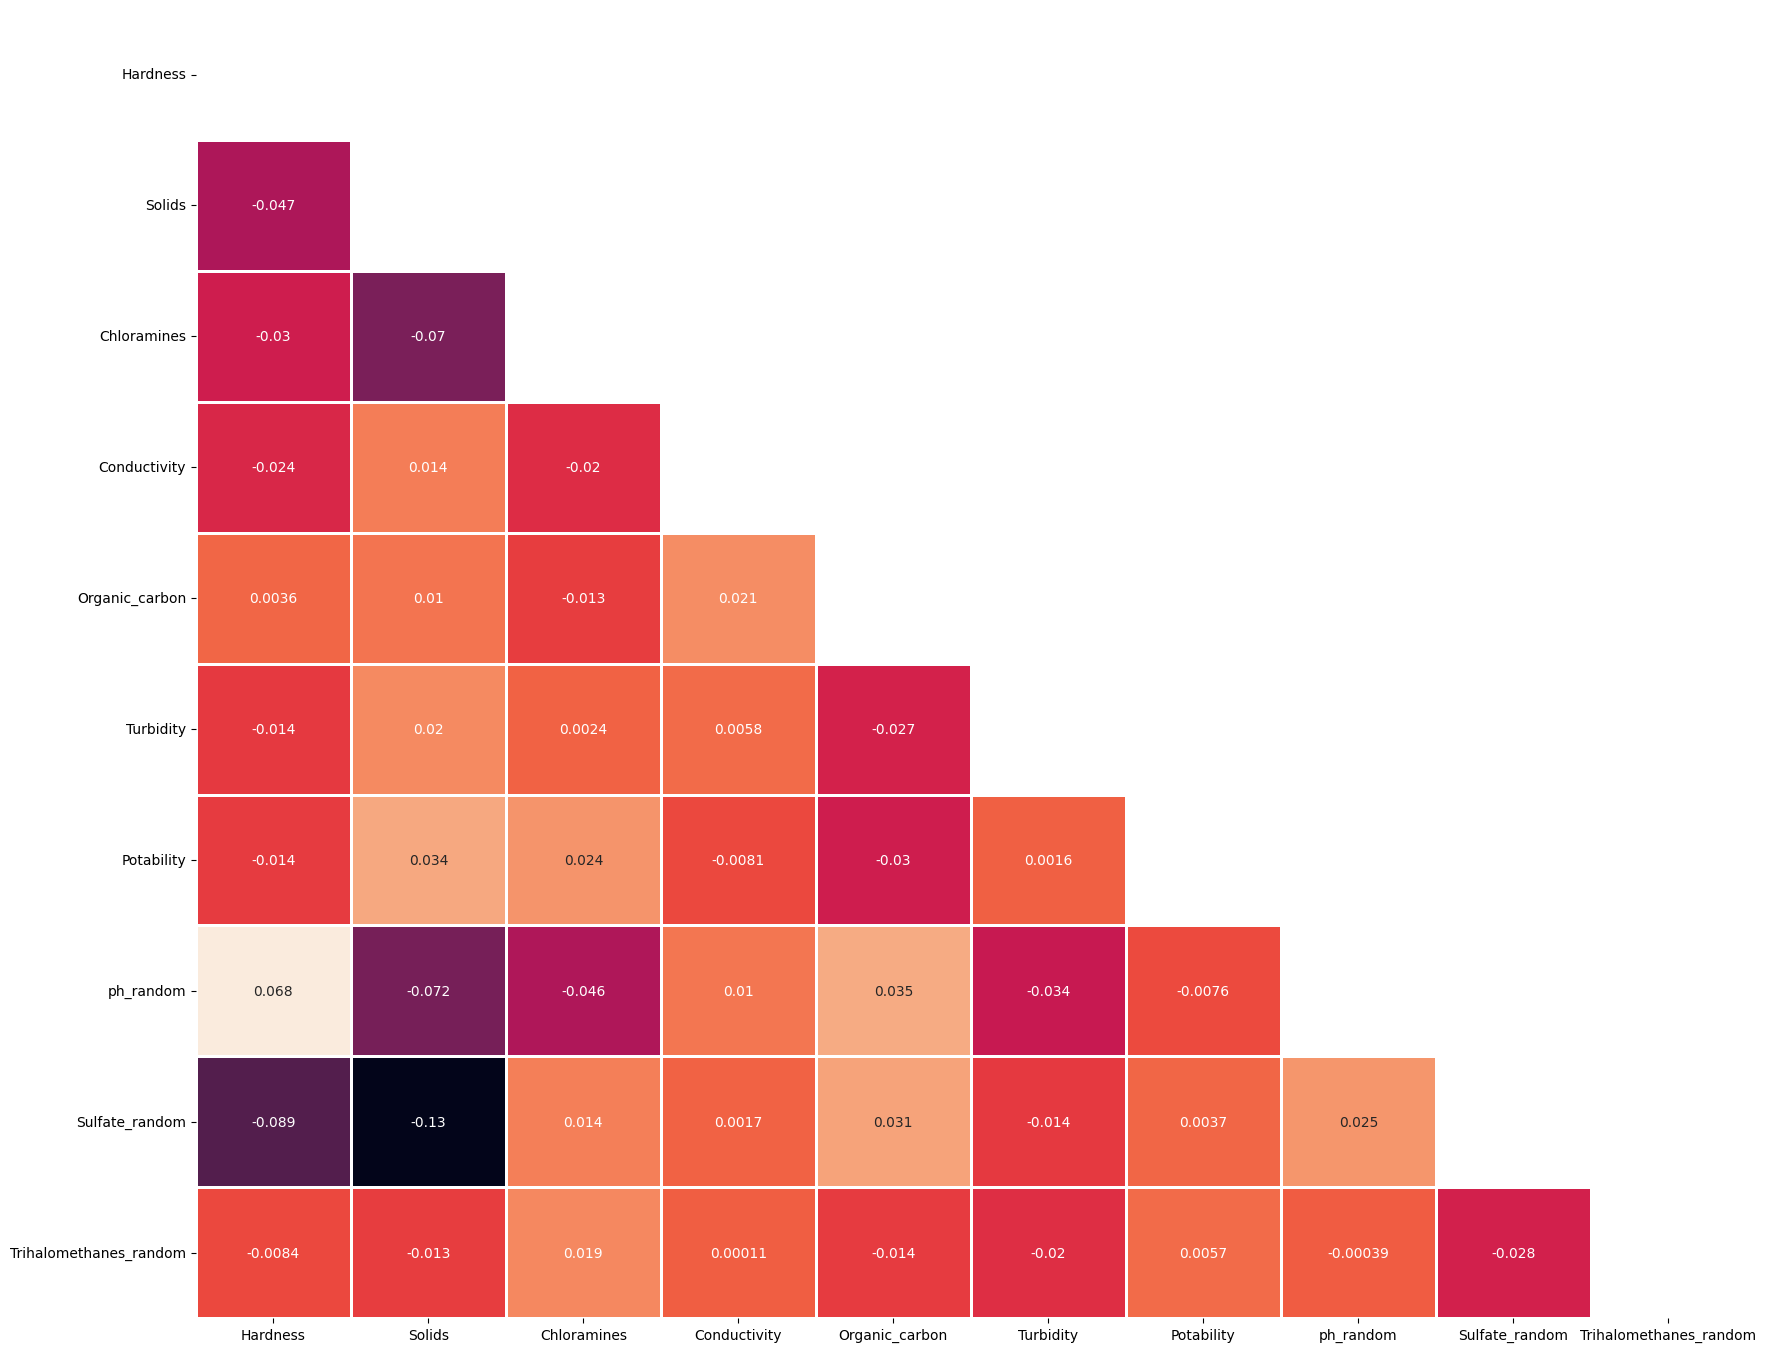

In [29]:
plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr()) #triu means upper matrix to avoid redundancy
sns.heatmap(data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket",cbar=False);

NO CORRELATED COLOUMNS

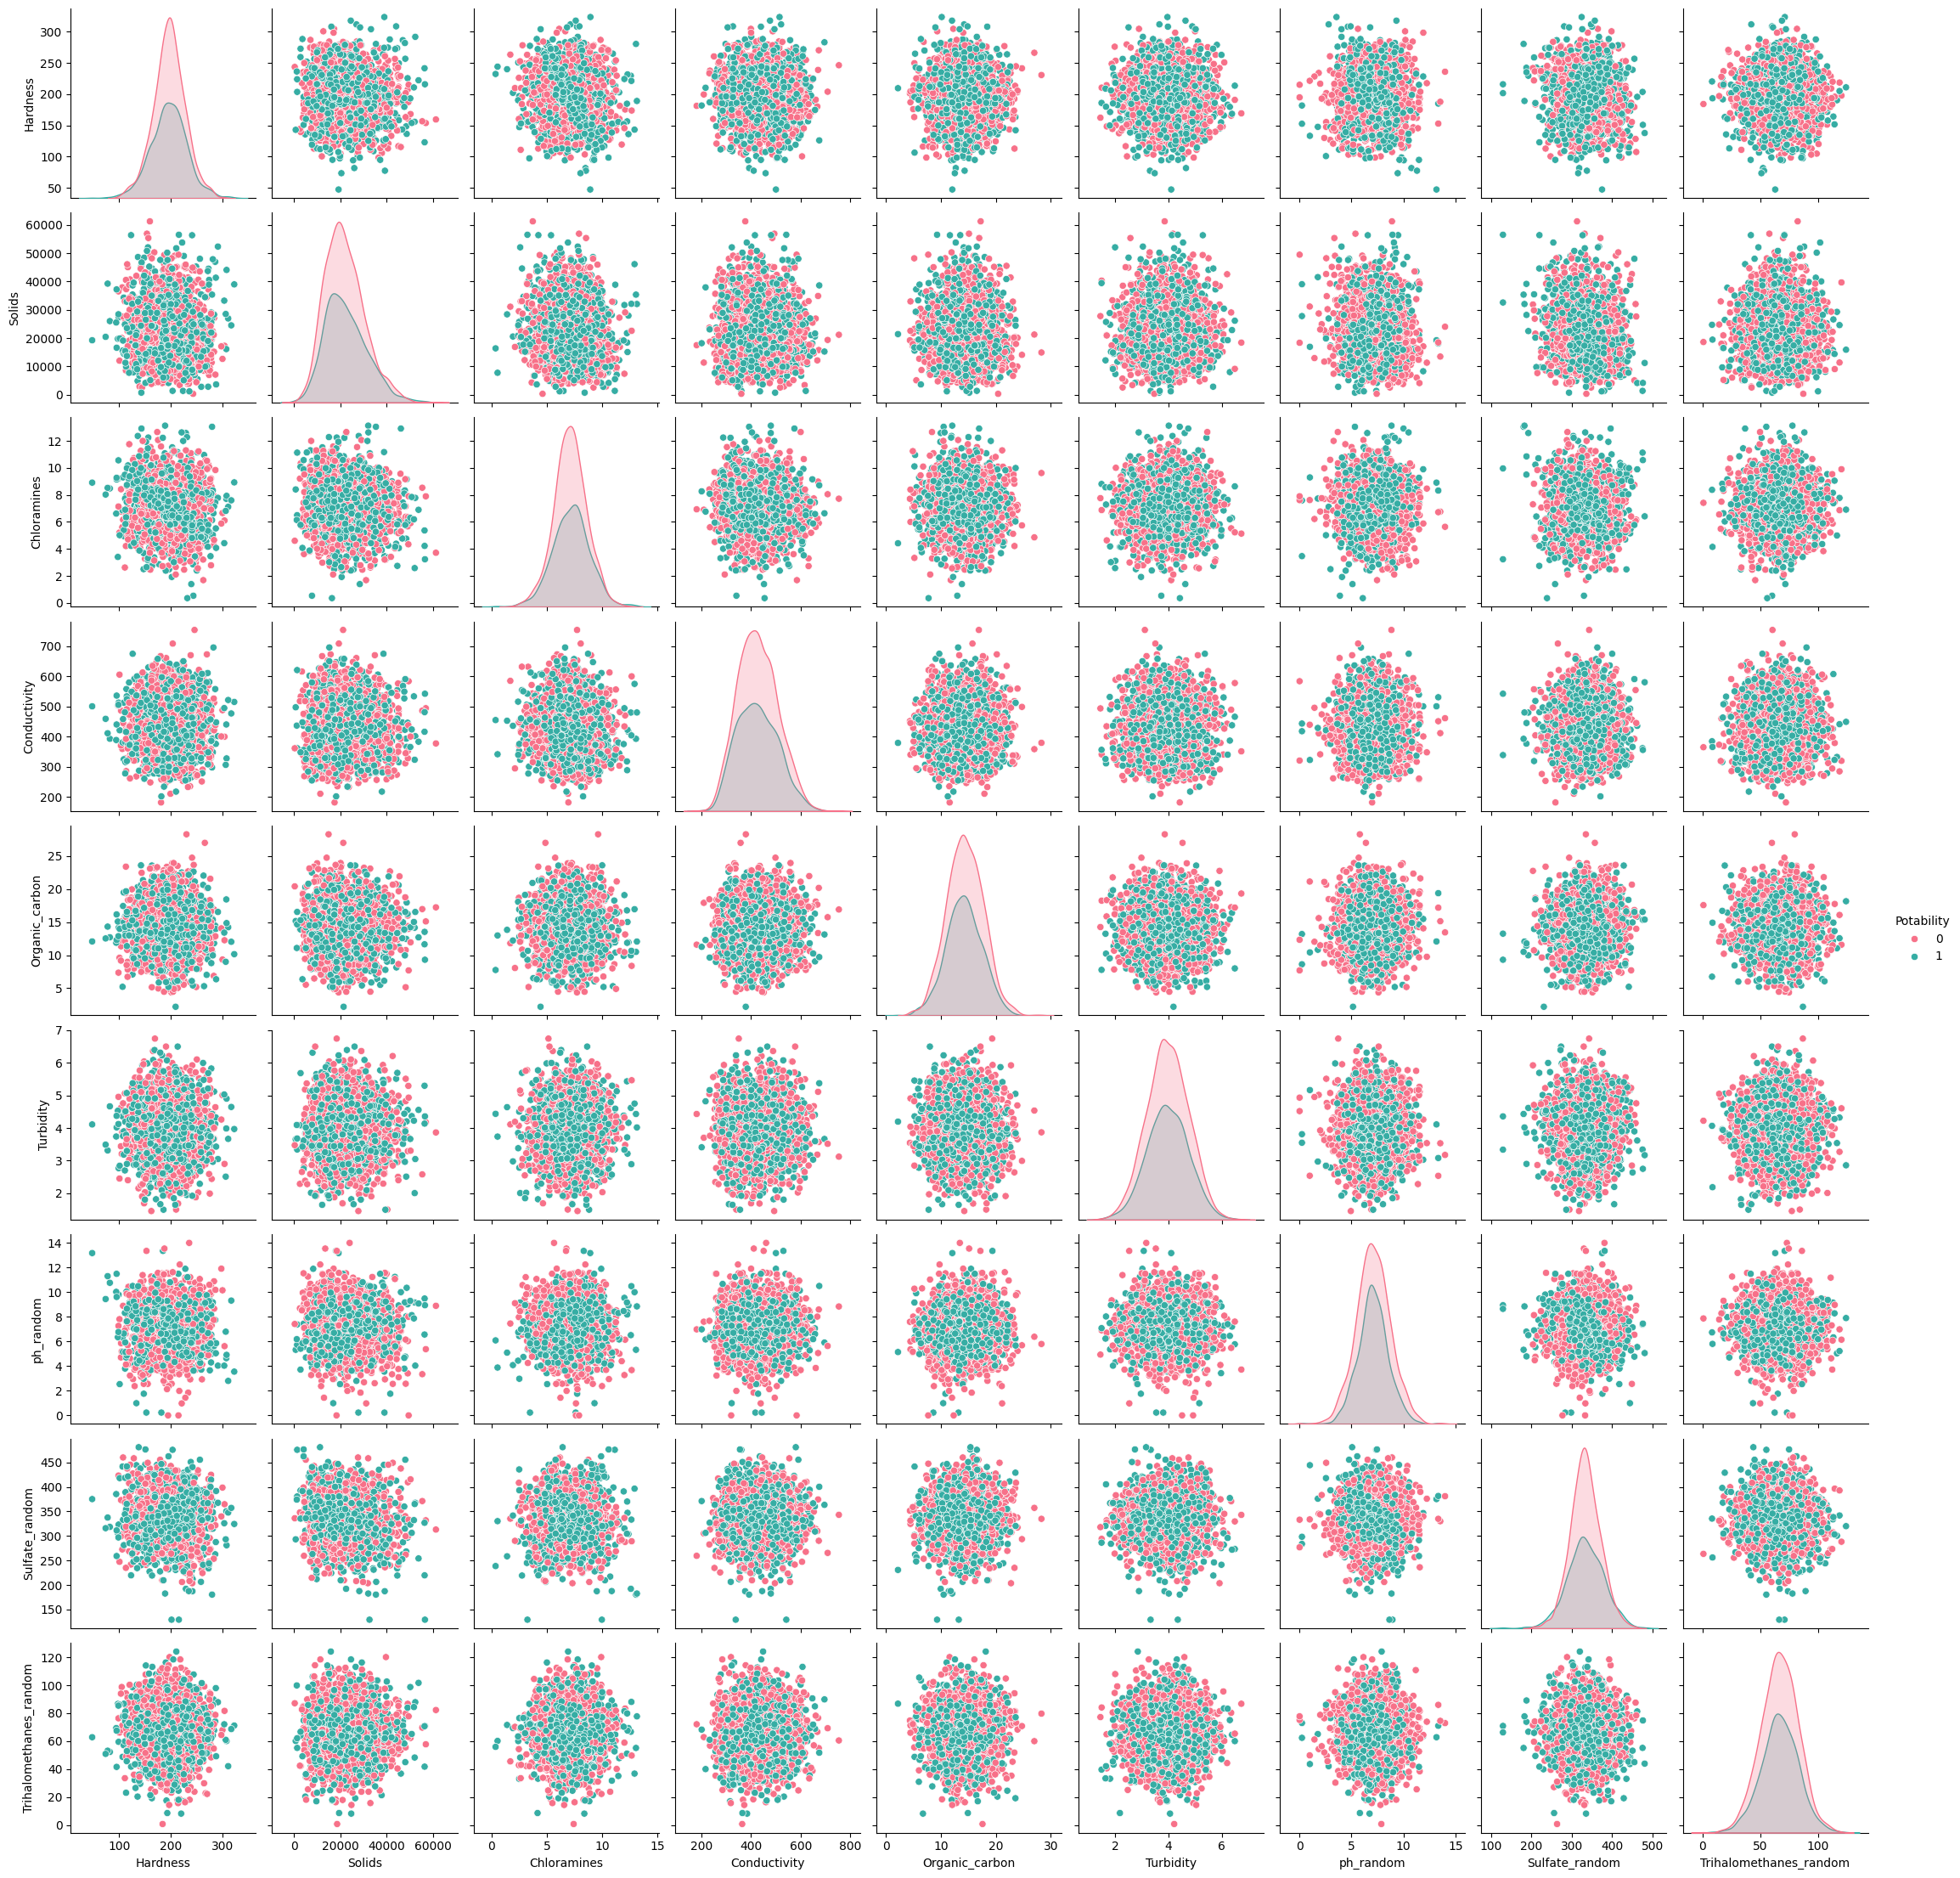

In [30]:
sns.pairplot(data, hue="Potability", palette="husl");

In [32]:
data['Hardness'].describe()

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64

<ipython-input-33-251f170cd4ca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Hardness'])


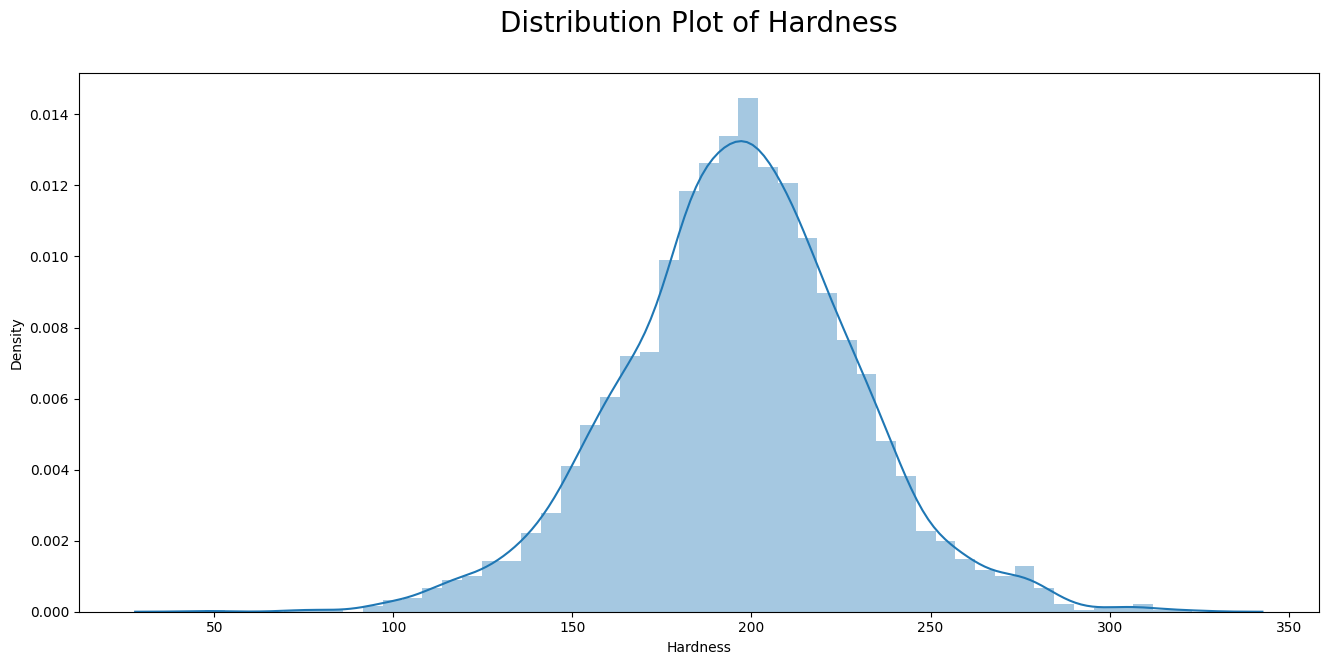

In [33]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Hardness'])
plt.title('Distribution Plot of Hardness\n', fontsize =  20)
plt.show()

In [34]:
fig = px.scatter(data,range(data['Hardness'].count()), sorted(data['Hardness']),
                 color=data['Potability'],
                 labels={
                     'x': "Count",
                     'y': "Hardness",
                     'color':'Potability'

                 }, template = 'plotly_dark')
fig.update_layout(title='Hardness wrt Potability')
fig.show()

In [35]:
px.histogram(data_frame = data, x = 'Hardness', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

In [36]:
 data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

<ipython-input-37-05229cf9be34>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




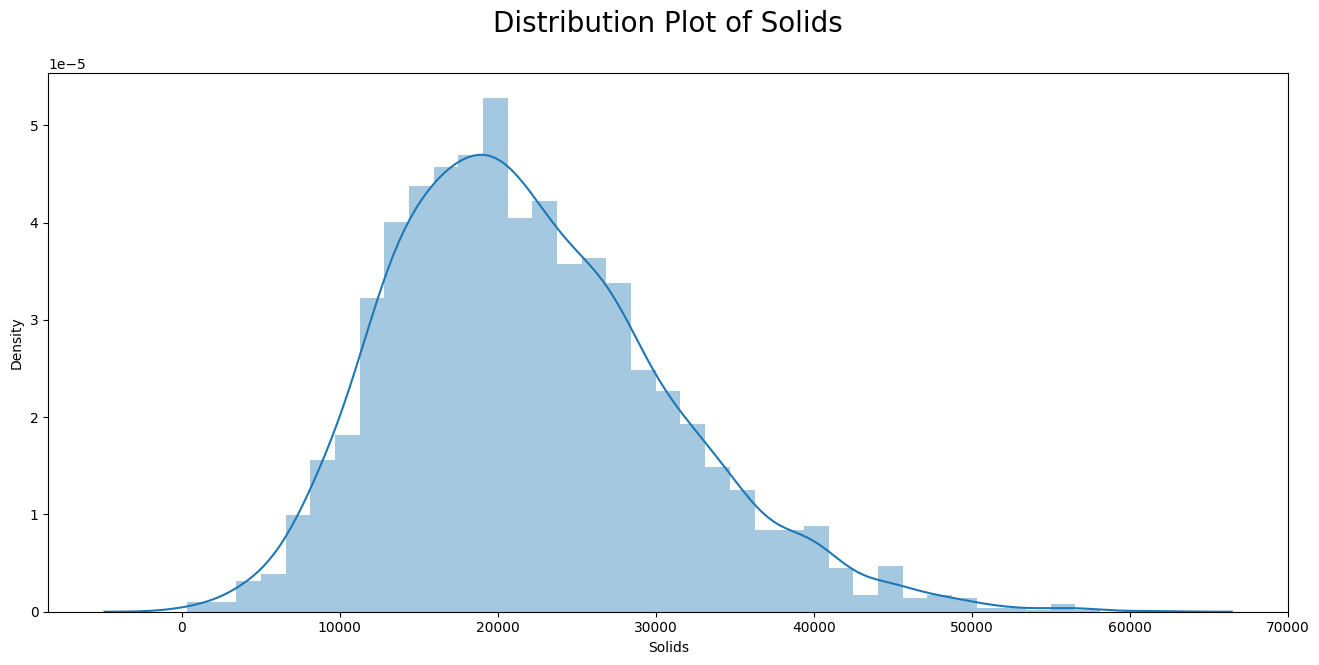

In [37]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Solids'])
plt.title('Distribution Plot of Solids\n', fontsize =  20)
plt.show()

In [38]:
fig = px.scatter(data, sorted(data["Solids"]), range(data["Solids"].count()), color="Potability", facet_col="Potability",
                 facet_row="Potability")
fig.show()

In [40]:
data['Trihalomethanes_random'].describe()

count    3276.000000
mean       66.419200
std        16.184832
min         0.738000
25%        55.861675
50%        66.639068
75%        77.384166
max       124.000000
Name: Trihalomethanes_random, dtype: float64

In [41]:
group_labels = ['Trihalomethanes_random'] # name of the dataset

fig = ff.create_distplot([data['Trihalomethanes_random']], group_labels)
fig.show()

In [43]:
fig = px.box(x = 'Trihalomethanes_random', data_frame = data, template = 'plotly_dark')
fig.update_layout(title='Trihalomethanes_random')
fig.show()

In [44]:
fig = px.line(x=range(data['Trihalomethanes_random'].count()), y=sorted(data['Trihalomethanes_random']),color=data['Potability'], labels={
                     'x': "Count",
                     'y': "Trihalomethanes",
                     'color':'Potability'

                 }, template = 'plotly_dark')
fig.update_layout(title='Trihalomethane wrt Potability')
fig.show()

In [45]:
data['Potability'].describe()

count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64

In [46]:
px.histogram(data_frame = data, x = 'Potability', color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [49]:
X=data.drop('Potability',axis=1)
y=data['Potability']

In [53]:
scaler=StandardScaler()
x=scaler.fit_transform(X)

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.85,random_state=42)


print("training data shape:-{} labels{} ".format(x_train.shape,y_train.shape))
print("testing data shape:-{} labels{} ".format(x_test.shape,y_test.shape))

training data shape:-(2784, 9) labels(2784,) 
testing data shape:-(492, 9) labels(492,) 


In [56]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0).fit(x_train,y_train)
log.score(x_test,y_test)

0.6219512195121951

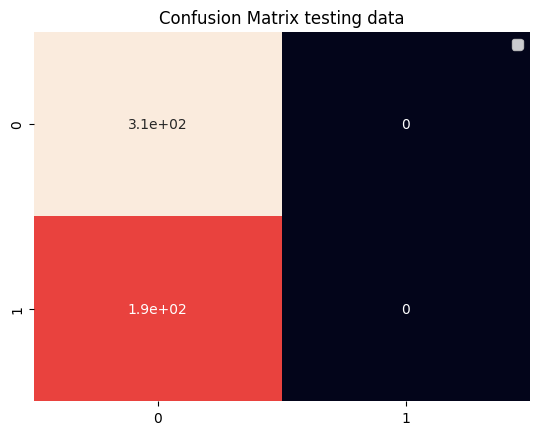

In [57]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=log.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=2)
# Train the model using the training sets
knn.fit(x_train,y_train)

#Predict Output
predicted= knn.predict(x_test) # 0:Overcast, 2:Mild

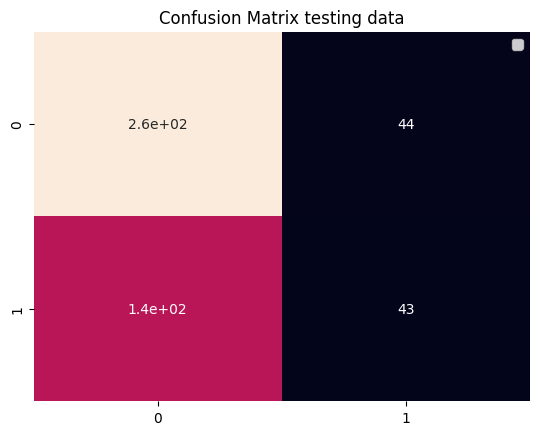

In [60]:
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=knn.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

In [61]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [62]:
svmc = svm.SVC()
svmc.fit(x_train, y_train)

y_pred = svmc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6808943089430894


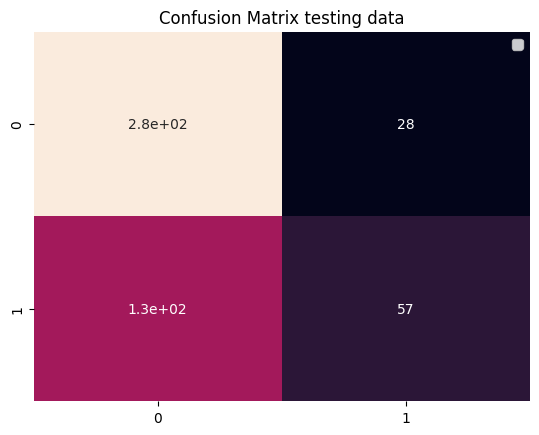

In [63]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=svmc.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score

xgb = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8,
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 8,
                    nthread= 5,
                    random_state= 0,
                    )
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.99, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=8, n_jobs=None, nthread=5,
              num_parallel_tree=None, ...)

In [65]:
print('Accuracy of XGBoost classifier on training set: {:.2f}'
     .format(xgb.score(x_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
     .format(xgb.score(x_test, y_test)))

Accuracy of XGBoost classifier on training set: 0.72
Accuracy of XGBoost classifier on test set: 0.63


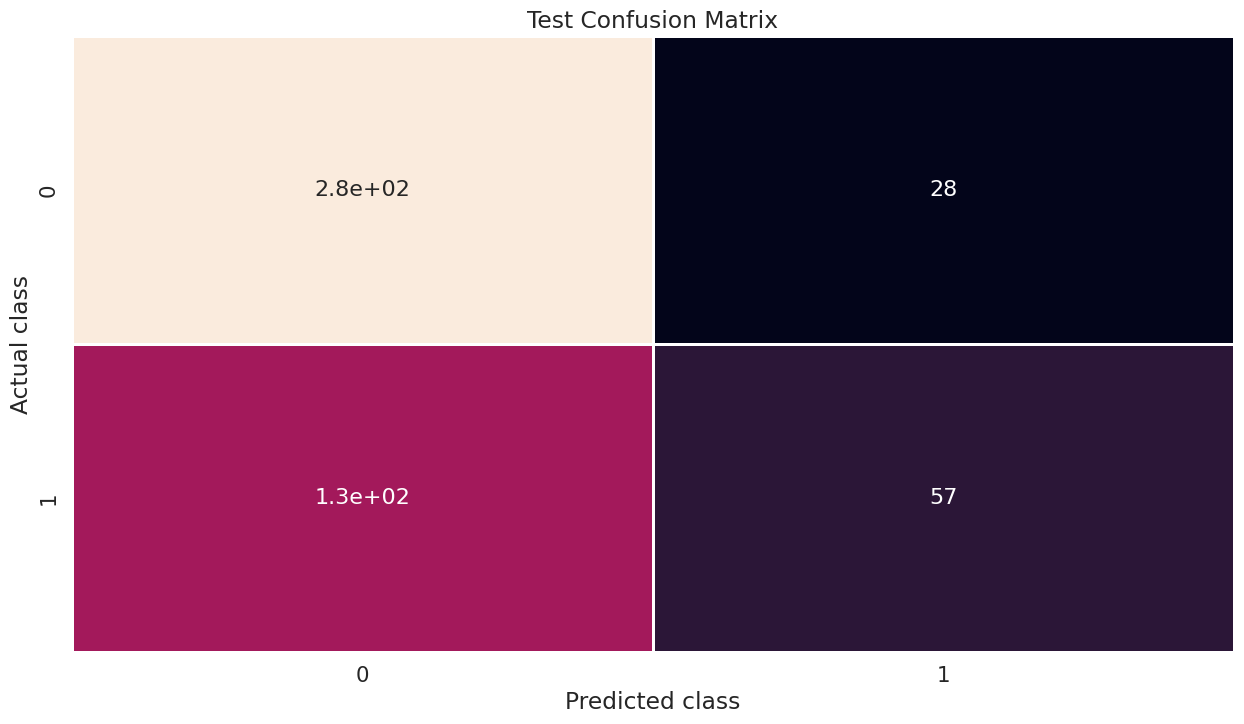

In [66]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16},cbar=False, linewidths = 1) # font size
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test.png')
plt.show()

Fitting 3 folds for each of 240 candidates, totalling 720 fits
